In [7]:
import pandas as pd
df=pd.read_csv("emotion.csv")
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [12]:
df.label.value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


<Axes: xlabel='label', ylabel='count'>

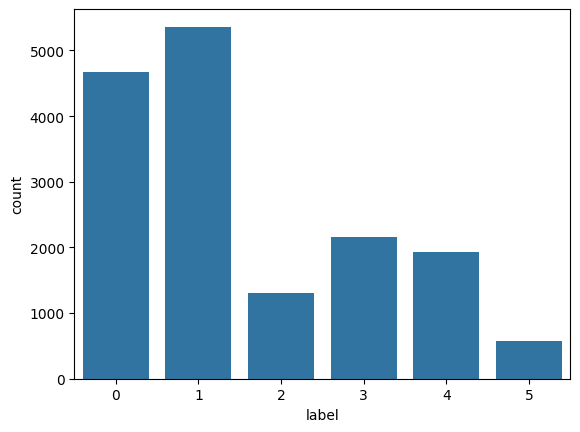

In [14]:
import seaborn as sns

sns.countplot(x=df.label)






In [15]:
# convert text to lower case

df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))






In [16]:
# checking for missing values

df.isna().sum()

,0
text,0
label,0


In [17]:
# convert text to lower case

df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
# filter stopwords

from nltk.corpus import stopwords

stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))



In [20]:
!pip insta;; textlob

/bin/bash: -c: line 1: syntax error near unexpected token `;;'
/bin/bash: -c: line 1: `pip insta;; textlob'


In [22]:
import pandas as pd
from nltk.stem import WordNetLemmatizer

# Sample DataFrame
data = {'text': ["running dogs", "better cars", "jumping high"]}
df = pd.DataFrame(data)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
df['text'] = df['text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

# Display result
print(df['text'].head())


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [23]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
# Do lemmatization

from nltk.stem import WordNetLemmatizer

from textblob import Word

df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df['text'].head()

,text
0,running dog
1,better car
2,jumping high


In [25]:
# get features and seperate data

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df['text'])

X = X.toarray()

y = df.label.values

AttributeError: 'DataFrame' object has no attribute 'label'

In [26]:

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample DataFrame
data = {'text': ["running dogs", "better cars", "jumping high"],
        'label': [1, 0, 1]}  # Example labels
df = pd.DataFrame(data)

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Transform text data
X = tfidf.fit_transform(df['text'])  # Feature matrix
X = X.toarray()  # Convert to dense array (optional)

# Extract labels
y = df['label'].values

# Output shapes
print("Feature matrix shape:", X.shape)
print("Label array shape:", y.shape)


Feature matrix shape: (3, 6)
Label array shape: (3,)


In [27]:
print(df.columns)


Index(['text', 'label'], dtype='object')


In [28]:
if 'label' in df.columns:
    y = df['label'].values
else:
    print("Error: 'label' column not found in DataFrame!")


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,

                                                    shuffle=True, random_state = 0)



In [30]:
from sklearn.naive_bayes import GaussianNB



#Initialize GaussianNB classifier

model = GaussianNB()

#Fit the model on the train dataset

model = model.fit(X_train, y_train)

#Make predictions on the test dataset

pred = model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
print(confusion_matrix(y_test, pred))



[[0 0]
 [1 0]]


In [33]:
print(accuracy_score(y_test, pred))



0.0


In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf_rf=RandomForestClassifier()



#Train the model using the training sets

clf_rf.fit(X_train,y_train)



rf_pred=clf_rf.predict(X_test).astype(int)

In [36]:
print(confusion_matrix(y_test, rf_pred))

[[1]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [37]:
print(accuracy_score(y_test, rf_pred))



1.0


In [38]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

lr_pred = logreg.predict(X_test)

In [39]:
print(confusion_matrix(y_test, lr_pred))

[[0 0]
 [1 0]]


In [40]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_